
| |<font size="5">LinearRegression الانحدار الخطي البسيط    </font>|
|-:|-:|
|<img src="https://raw.githubusercontent.com/arvention/linear-regression/master/animation.gif" width=300></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4"> Train, Test  تحديد بيانات التدريب والاختبار </font>| 
||<font size="4">Sklearn  توظيف خوارزمية من مكتبة </font>| 
||<font size="4"> training   تدريب البيانات </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>| 


In [ ]:
pwd 

'/content'

In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice_P.csv", index_col=0)

In [2]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2008,WD,Normal,208500,2566,61,3.5,0.866025,5.000000e-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,2007,WD,Normal,181500,2524,0,2.5,0.500000,-8.660254e-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000,-1.836970e-16


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

### معالجة البيانات 
#### سلم البيانات

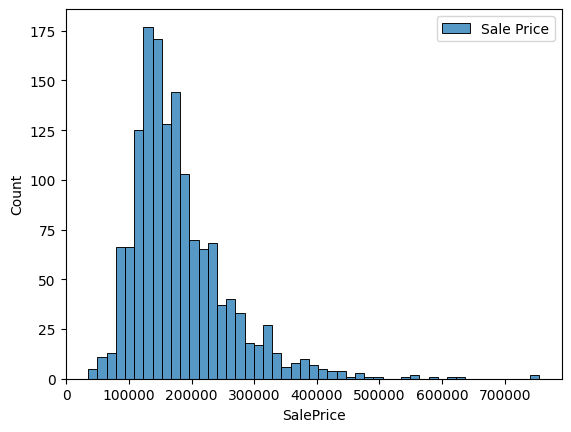

In [5]:
# التخطيط البياني لأسعار العقارات

import seaborn as sns
import matplotlib.pyplot as plt
_=sns.histplot(df.SalePrice, label="Sale Price")
# _=sns.distplot(df_train.OverallQual, label="OverAll Quality")
plt.legend()

 standard score   :
طريقة احتساب    
$\large  z= \frac{x-\mu}{\sigma}$

In [6]:
# تعديل    معدل الأسعار وقيمة الاتحدار المعياري 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df["Scaled_OverallQal"]=scaler.fit_transform(df[["OverallQual"]])

In [7]:
df["Scaled_SalePrice"]=scaler.fit_transform(df[["SalePrice"]])

In [8]:
df[["Scaled_OverallQal", "Scaled_SalePrice"]].head()

,Scaled_OverallQal,Scaled_SalePrice
0,0.658292,0.349002
1,-0.070084,0.008535
2,0.658292,0.538150
3,0.658292,-0.514775
4,1.386668,0.872312


In [9]:
# التحقق من تعديل الباينات
df.Scaled_SalePrice.std()  , df.Scaled_SalePrice.mean()

(np.float64(1.000343819848564), np.float64(1.0743601502901859e-16))

In [11]:
# حفظ البيانات
df.to_csv("../data/HousePrice2.csv")

In [12]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Scaled_OverallQal,Scaled_SalePrice
1073,1074,60,RL,75.0,7950,Pave,NaN,IR1,Bnk,AllPub,...,WD,Normal,159500,2116,0,1.5,-5.000000e-01,-0.866025,-0.070084,-0.268882
1209,1210,20,RL,85.0,10182,Pave,NaN,IR1,Lvl,AllPub,...,New,Partial,290000,3320,50,3.0,5.000000e-01,-0.866025,1.386668,1.376707
750,751,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,WD,Normal,96500,1716,160,1.0,1.224647e-16,-1.000000,-1.526837,-1.063304


In [13]:
# تحديد المتغيرات  والهدف 
X=df.Scaled_OverallQal.values.reshape(-1,1)
y=df.Scaled_SalePrice.values.reshape(-1,1)


![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [14]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.3, random_state=42)

![](https://static.thenounproject.com/png/2010152-200.png)

In [13]:
# تحميل النموذج
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [14]:
# تدريب البيانات 
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# التنبؤ
y_pred=lreg.predict(X_test)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [16]:
print(f" Score  : {lreg.score(X_test, y_test):.3f}")

 Score  : 0.669


In [18]:
# القياس 
from sklearn import metrics
import numpy as np
print(f" MAE  : {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f" MSE  : {metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f" MSE  : {metrics.mean_squared_error(y_test, y_pred):.3f}")

print(f" R2  : {metrics.r2_score(y_test, y_pred):.3f}")


 MAE  : 0.407
 MSE  : 0.317
 MSE  : 0.317
 R2  : 0.669


In [ ]:
lreg.coef_ , lreg.intercept_

(array([[0.77318069]]), array([-0.01121309]))

In [ ]:
df_pred=pd.DataFrame( {"Actual_P": y_test.ravel(), "Predicted_P": y_pred.ravel() })

In [ ]:
# إظهار تنيجة التنبؤ 
df_pred.head()

,Actual_P,Predicted_P
0,-0.332697,-0.066755
1,1.814245,1.051752
2,-0.830082,-0.626009
3,-0.276032,-0.066755
4,1.694621,1.611005


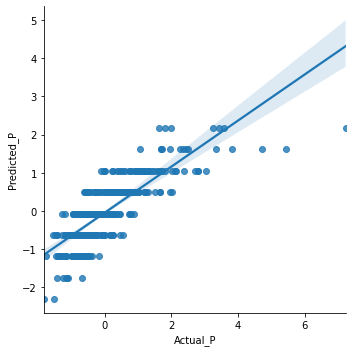

In [ ]:
# الرسم البياني لأسعار العقارات الأصلية وتلك التي تم التنبؤ بها
import seaborn as sns
# sns.set()
_=sns.lmplot("Actual_P",  "Predicted_P", data=df_pred)

In [ ]:
# إذا ما أردنا تحديد السعر الحقيقي 
df_pred[" Unscaled_Pred_Price"]=scaler.inverse_transform(df_pred[["Predicted_P"]])

In [ ]:
df_pred.sample(4)

,Actual_P,Predicted_P,Unscaled_Pred_Price
249,-0.830082,-0.626009,131206.519575
206,0.737626,1.051752,264446.352170
306,-0.515281,0.492498,220033.074639
395,3.341168,1.611005,308859.629702


In [ ]:
pd.DataFrame({
    "Original_Price": scaler.inverse_transform(df_pred.Actual_P), 
    "Predicted_Price": scaler.inverse_transform(df_pred.Predicted_P),
}).sample(3)

,Original_Price,Predicted_Price
85,133000.0,86793.242044
256,115000.0,175619.797107
140,403000.0,264446.352170


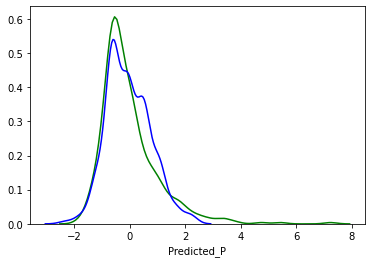

In [ ]:
#   تخطيط البيانات الاصلية  / التنبؤ
import seaborn as sns
import matplotlib.pyplot as plt


_=sns.distplot(df_pred.Actual_P, hist=False, bins=10, color="g")
_= sns.distplot(df_pred.Predicted_P,hist=False,  bins=10, color="b" )

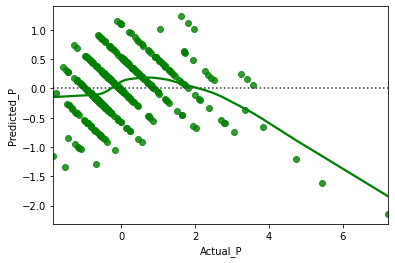

In [ ]:
# نخطيط البقايا
_=sns.residplot(df_pred.Actual_P, df_pred.Predicted_P, lowess=True, color="g")

In [ ]:
pip install scikit-plot 

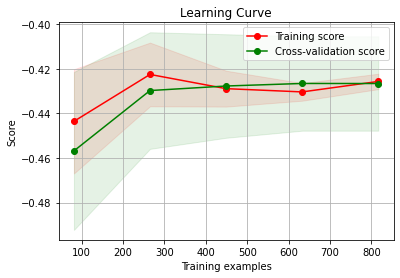

In [ ]:
# تخطيط التعلم 
import scikitplot as skplt

skplt.estimators.plot_learning_curve(lreg, X_train, y_train, scoring="neg_mean_absolute_error")

In [ ]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
||<font size="4">PipeLine  انشاء بنية معالجة متسلسلة للبيانات  </font>| 
